# REGLAS DE ASOCIACIÓN

Para este ejecicio vamos a trabajar con el clásico dataset de la cesta de la compra, que se compone de miles de transacciones y que contiene 169 ítems o productos. 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### Cargamos los datos

Al leer el fichero, leemos todas las líneas y las partimos por el punto y coma. Una vez hecho esto, eliminamos todos los espacios en blanco que pudieran quedar por delante o por detrás de los items.

In [14]:
with open("cesta_compra.txt") as f:
    content = f.readlines()
# Partimos todas las líneas, con strip eliminamos espacios al inicio y final
content = [x.strip().split(";") for x in content]
# Eliminamos espacios al inicio y al final
content = [[x.strip() for x in row] for row in content]

print(content[0:5])

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']]


Cargamos la función TransactionEncoder de la librería mlxtend.preprocessing, la cual usaremos para convertir nuestra lista anterior en un dataframe en el que las columnas son el nombre de los productos y el valor pasa a ser True o False según si en esa posición se encontraba ese producto

In [15]:
te = TransactionEncoder()
te_ary = te.fit(content).transform(content)
#groceries = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)
groceries = pd.DataFrame(te_ary, columns=te.columns_)
groceries.head()

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   
2           False      False  False          False             False  False   
3           False      False  False          False             False  False   
4           False      False  False          False             False  False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False               False   False        False   
1  ...   False    False    False               False   False        False   
2  ...   False    False    False               False   False        False   
3  ...   False    False    False               False   False        False   
4  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False       False   False     False  
1       False       False    True     False  
2       False        True   False     False  
3       False       False    True     False  
4       False        True   False     False  

[5 rows x 169 columns]

Exraemos las reglas asociadas con sus métricas. Establecemos un máximo de tres ítems frecuentes para centrarnos en las reglas más básicas. Aquí tenemos dos funciones:
- apriori(): Evalúa el valor del soporte para cada producto.
- association_rules(): Nos ayuda a entender la relación entre los productos antecedentes y consecuentes. Nos aporta mas información destacable sobre los productos.

Para la toma de decisiones, las variables más importantes serán:

- antecedent support
- consequent support
- support
- confidence
- lift

In [31]:
frequent_itemsets = apriori(groceries, min_support=0.001, use_colnames=True, max_len = 2)

In [32]:
frequent_itemsets.sort_values("support", ascending = False).head(10)

support            itemsets
154  0.255516        (whole milk)
96   0.193493  (other vegetables)
115  0.183935        (rolls/buns)
130  0.174377              (soda)
155  0.139502            (yogurt)
10   0.110524     (bottled water)
116  0.108998   (root vegetables)
147  0.104931    (tropical fruit)
125  0.098526     (shopping bags)
122  0.093950           (sausage)

De aquí podemos sacar ya alguna información:
- El 25 % de las compras incluyen leche.
- Mas del 19 % de las compras incluyen verduras (other vegetables).
- El 18 % de las compras incluyen rolls / buns.
- Mas del 17 % de las compras incluyen soda.

In [34]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

rules.sort_values(['lift', 'confidence'], ascending = False).head(10)

antecedents         consequents  antecedent support  \
4              (honey)        (whole milk)            0.001525   
10           (tidbits)        (rolls/buns)            0.002339   
6               (rice)  (other vegetables)            0.007626   
7   (specialty cheese)  (other vegetables)            0.008541   
1            (cereals)        (whole milk)            0.005694   
9               (rice)        (whole milk)            0.007626   
2       (cocoa drinks)        (whole milk)            0.002237   
8     (pudding powder)        (whole milk)            0.002339   
5                (jam)        (whole milk)            0.005389   
0      (baking powder)        (whole milk)            0.017692   

    consequent support   support  confidence      lift  leverage  conviction  
4             0.255516  0.001118    0.733333  2.870009  0.000729    2.791815  
10            0.183935  0.001220    0.521739  2.836542  0.000790    1.706318  
6             0.193493  0.003965    0.520000  2.687441  0.002490    1.680224  
7             0.193493  0.004270    0.500000  2.584078  0.002618    1.613015  
1             0.255516  0.003660    0.642857  2.515917  0.002206    2.084555  
9             0.255516  0.004677    0.613333  2.400371  0.002729    1.925390  
2             0.255516  0.001322    0.590909  2.312611  0.000750    1.819850  
8             0.255516  0.001322    0.565217  2.212062  0.000724    1.712313  
5             0.255516  0.002949    0.547170  2.141431  0.001572    1.644069  
0             0.255516  0.009253    0.522989  2.046793  0.004732    1.560725

- antecedent support nos da la probabilidad de que se compre el producto o productos en antecedents.
- consequent support nos da la probabilidad de que se compre el producto en consequents.
- support es la probabilidad de que se compren conjuntamente antecendents y consequents.
- Lift es confidence/consequent support.

Vemos el resultado en una gráfica.

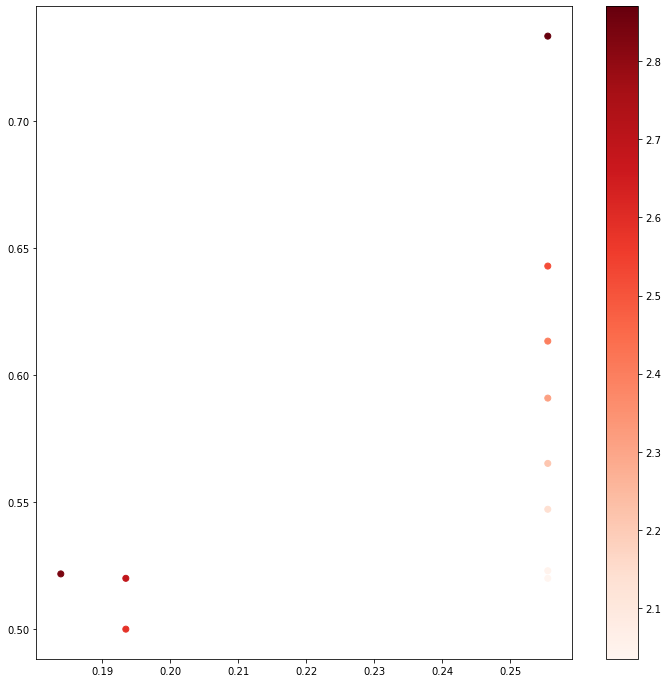

In [35]:
plt.figure(figsize=(12, 12))
cm = plt.cm.get_cmap('Reds')
sc = plt.scatter(rules["consequent support"], rules["confidence"], c=rules["lift"], cmap=cm)
plt.colorbar(sc)
plt.show()

Los productos con un soporte bajo y una confianza media tienen un gran lift ya que significa que de por si se compran poco (soporte bajo) pero que al recomendarlos junto a otro producto aumenta la probabilidad de compra.

Otra forma de verlo sería en un grafo, para ello utilizamos el código que se propone en el siguiente enlace: http://intelligentonlinetools.com/blog/2018/02/10/how-to-create-data-visualization-for-association-rules-in-data-mining/

In [37]:
def draw_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
    
     
        for a in rules.iloc[i]['antecedents']:
                
            G1.add_nodes_from([a])
        
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
        for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
 
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
           pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

In [38]:
rules[0:5]

antecedents   consequents  antecedent support  consequent support  \
0      (baking powder)  (whole milk)            0.017692            0.255516   
1            (cereals)  (whole milk)            0.005694            0.255516   
2       (cocoa drinks)  (whole milk)            0.002237            0.255516   
3  (cooking chocolate)  (whole milk)            0.002542            0.255516   
4              (honey)  (whole milk)            0.001525            0.255516   

    support  confidence      lift  leverage  conviction  
0  0.009253    0.522989  2.046793  0.004732    1.560725  
1  0.003660    0.642857  2.515917  0.002206    2.084555  
2  0.001322    0.590909  2.312611  0.000750    1.819850  
3  0.001322    0.520000  2.035097  0.000672    1.551008  
4  0.001118    0.733333  2.870009  0.000729    2.791815

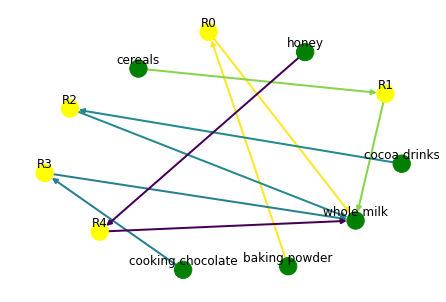

In [39]:
draw_graph(rules, 5)